In [3]:

import numpy as np
from CartPole import *
from sklearn import linear_model
import time
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
def simulate(visual, state, steps, remap_angle):
    cp = CartPole(visual)
    cp.setState(state)
    cp.sim_steps = 1
    cp.delta_time = 0.1
    steps = np.arange(0, steps + 1)
    states = cp.getState()

    for _ in steps[:-1]:
        cp.performAction()
        states = np.vstack([states, cp.getState()])
    
    steps = np.tile(steps, (4, 1))
    return steps.T, states
    




In [7]:
def get_subplot(title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    fig.suptitle(title)
    return fig, axs

def plot_states(x, y, fig, axs, color):
    axs[0,0].plot(x[:, 0], y[:, 0], color=color)
    axs[0,1].plot(x[:, 1], y[:, 1], color=color)
    axs[1,0].plot(x[:, 2], y[:, 2], color=color)
    axs[1,1].plot(x[:, 3], y[:, 3], color=color)

    #Set titles
    axs[0,0].set_title('cart location')
    axs[0,0].set_xlabel('steps')
    axs[0,0].set_ylabel(r'$x$')

    axs[0,1].set_title('cart velocity')
    axs[0,1].set_xlabel('Steps')
    axs[0,1].set_ylabel(r'$\dot{x}$')


    axs[1,0].set_title('pole angle')
    axs[1,0].set_xlabel('steps')
    axs[1,0].set_ylabel(r'$\theta$')

    axs[1,1].set_title('pole velocity')
    axs[1,1].set_xlabel('steps')
    axs[1,1].set_ylabel(r'$\dot{\theta}$')

    # fig.legend()
  

In [ ]:
# Simple oscillations around stable equilibrium, vary velocity

fig, axs = get_subplot("Simple oscillation around stable equilibrium")

n = 6
colors = plt.cm.jet(np.linspace(0,1,n))

pos = np.linspace(0, 0, n)
vel = np.linspace(-10, 10, n)
angular_pos = np.linspace(np.pi, np.pi, n)
angular_vel = np.linspace(0, 0, n)

states = np.vstack([pos, vel, angular_pos, angular_vel]).T

for i in range(n):
    x, y = simulate(False, states[i], 100, False)
    plot_states(x, y, fig, axs, colors[i])
    plt.plot(x, i*y, color=colors[i])


In [ ]:
# Simple oscillations around stable equilibrium, vary angular velocity

# plot_states(x, y, r"$\dot{x}=%.1f, \dot{\theta}=%.1f$" % (state[1], state[3]), fig, axs)

fig, axs = get_subplot("Simple oscillation around stable equilibrium")

n = 6
colors = plt.cm.jet(np.linspace(0,1,n))

pos = np.linspace(0, 0, n)
vel = np.linspace(0, 0, n)
angular_pos = np.linspace(np.pi, np.pi, n)
angular_vel = np.linspace(-15, 15, n)

states = np.vstack([pos, vel, angular_pos, angular_vel]).T

for i in range(n):
    x, y = simulate(False, states[i], 100, False)
    plot_states(x, y, fig, axs, colors[i])
    plt.plot(x, i*y, color=colors[i])



In [ ]:
from scipy.interpolate import interp1d

n = 20
colors = plt.cm.jet(np.linspace(0,1,n))

pos = np.linspace(0, 0, n)
vel = np.linspace(0, 0, n)
angular_pos = np.linspace(np.pi, np.pi, n)
angular_vel = np.linspace(-10, 10, n)

states = np.vstack([pos, vel, angular_pos, angular_vel]).T

for i in range(n):
    _, y = simulate(False, states[i], 100, False)
    x, y = y[50:, 1], y[50:, 3]
    cubic_interpolation_model = interp1d(x, y, kind='linear')
 
    # Plotting the Graph
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = cubic_interpolation_model(xi)

    plt.plot(xi, yi, color=colors[i])
    plt.grid()
    # plot_states(x, y, fig, axs, colors[i])
    # pl.plot(x, i*y, color=colors[i])


### Simple oscillations

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

pos = 1.5
vel = 0
angular_pos = np.pi
angular_vel = 10

state = [pos, vel, angular_pos, angular_vel]

steps, states = simulate(False, state, 1000, False)
x, y = states[:50, 1], states[:50, 3]
print(states[1, 0])
n = y.shape[0]

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(steps[:, 0])
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(-10, 10)
plt.arrow(x[0], y[0], y[1], y[1]-y[0], shape='full', lw=0.1, length_includes_head=True, head_width=2)

plt.show()





In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

pos = 0
vel = 0
angular_pos = np.pi
angular_vel = 15

state = [pos, vel, angular_pos, angular_vel]

steps, states = simulate(False, state, 1000, False)
x, y = states[:, 2], states[:, 3]
n = x.shape[0]

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, n)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(steps[:, 0])
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(-10, 10)

plt.show()


### Task 1.2

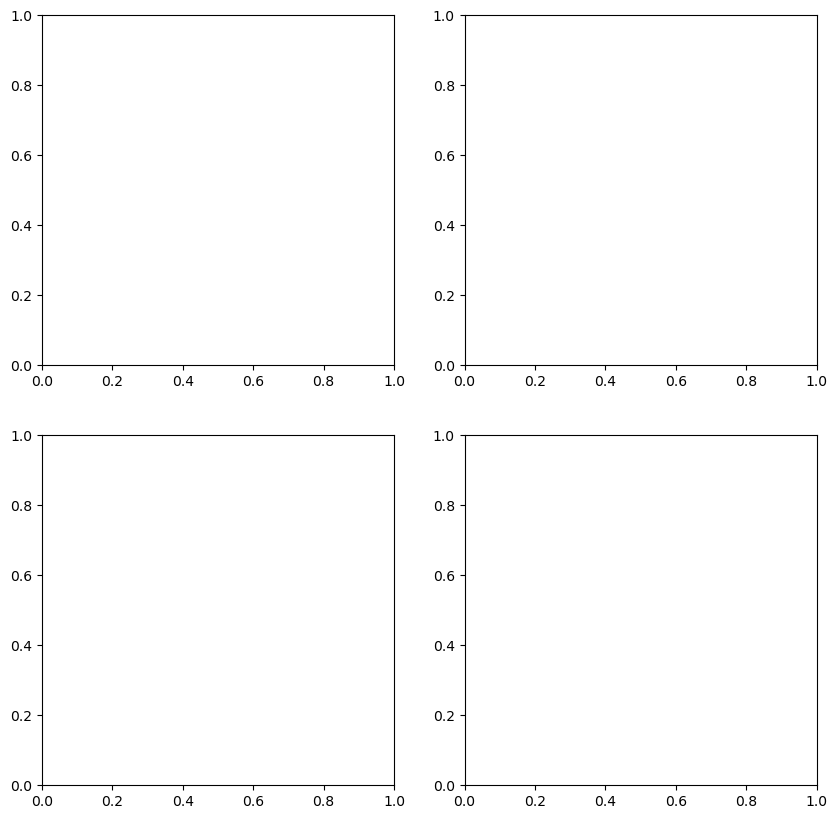

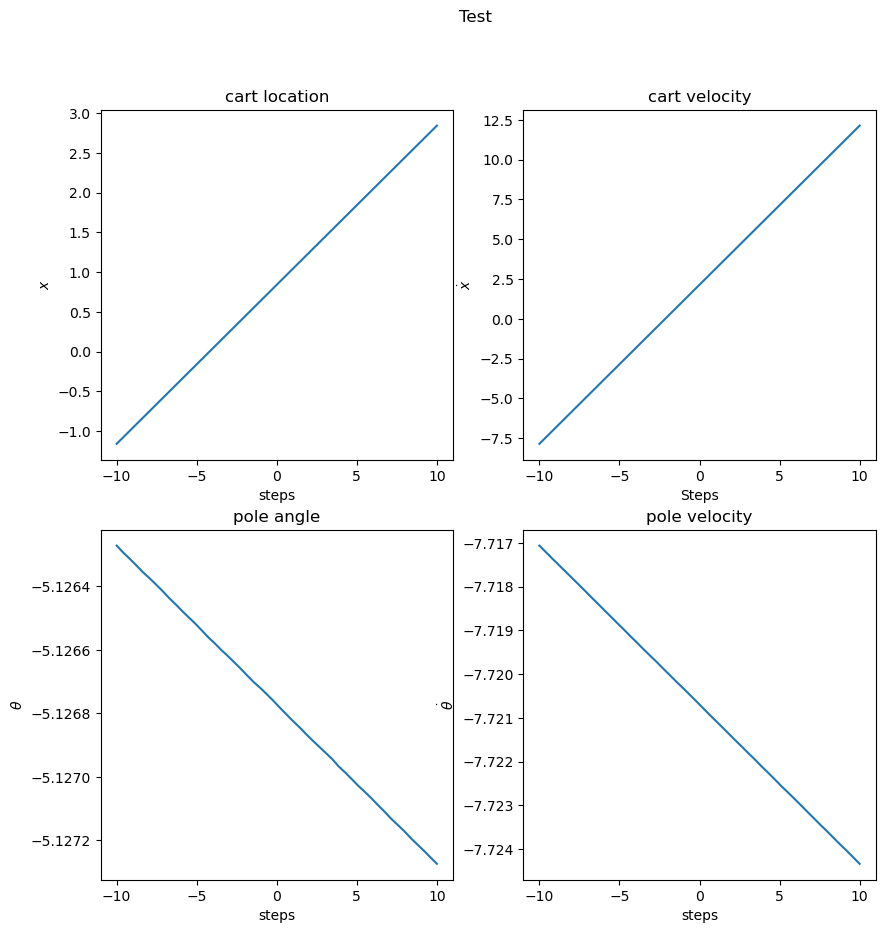

In [16]:
from numpy.random import default_rng


cp = CartPole(False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vel = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW
vels = np.linspace(VEL_LOW, VEL_HIGH, n)
# pos = np.zeros(n)
# vel = rng.random(size=n) * (VEL_HIGH - VEL_LOW) + VEL_LOW
# ang = rng.random(size=n) * (ANG_HIGH - ANG_LOW) + ANG_LOW
# ang_vel = rng.random(size=n) * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW


fig, axs = get_subplot("")

y = np.zeros(4)

for vel in vels:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState()])

    cp.reset()
    
y = y[1:, :]
x = np.tile(vels, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)


    


[[ 0.          0.          0.          0.        ]
 [-0.06315006 -2.3080485  -5.2020507  -8.181617  ]
 [-0.0829761  -2.4944742  -5.109016   -7.6151342 ]
 [-0.10173477 -2.6687243  -5.0180006  -7.0961404 ]
 [-0.11946274 -2.8316503  -4.928714   -6.619371  ]
 [-0.13619527 -2.9840977  -4.840904   -6.180105  ]
 [-0.15196389 -3.1268704  -4.754324   -5.7741947 ]
 [-0.16679958 -3.2607298  -4.6687536  -5.3980722 ]
 [-0.18072915 -3.3863761  -4.5839915  -5.048729  ]
 [-0.19377902 -3.504468   -4.499852   -4.7236657 ]
 [-0.20597374 -3.6156247  -4.4161663  -4.420842  ]
 [-0.2173385  -3.7204392  -4.3327723  -4.138637  ]
 [-0.22789651 -3.8194785  -4.2495294  -3.8758094 ]
 [-0.23767309 -3.9133022  -4.166304   -3.6314404 ]
 [-0.24669492 -4.002467   -4.082975   -3.4048824 ]
 [-0.25499064 -4.087516   -3.999431   -3.1956842 ]
 [-0.2625921  -4.1689854  -3.915568   -3.0034845 ]
 [-0.26953378 -4.247376   -3.831293   -2.8278577 ]
 [-0.2758554  -4.323138   -3.7465174  -2.6681361 ]
 [-0.28160024 -4.3966255  -3.66

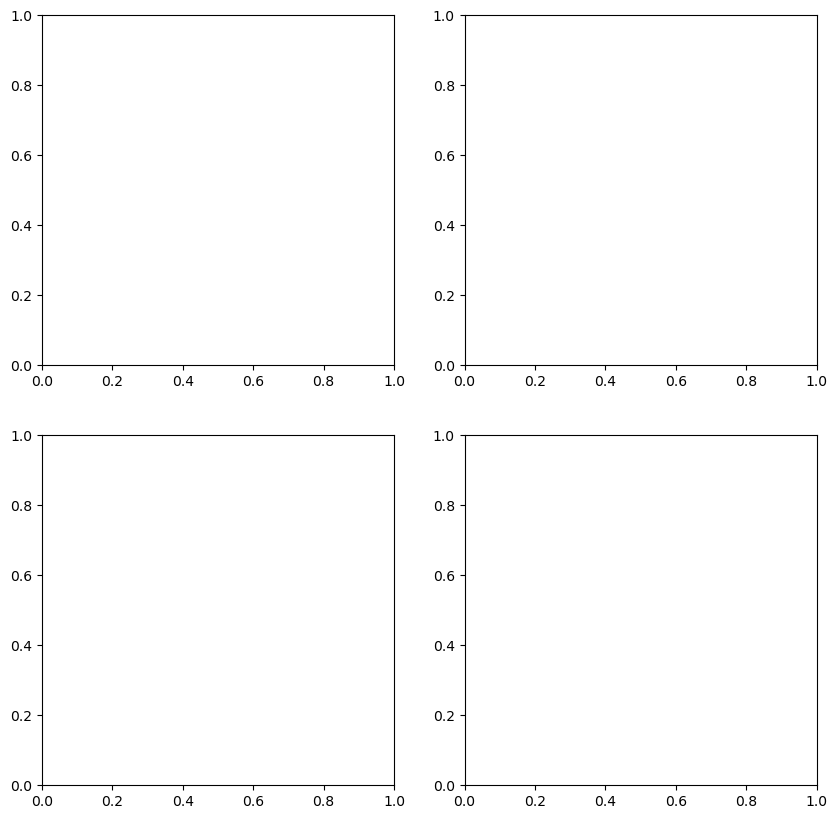

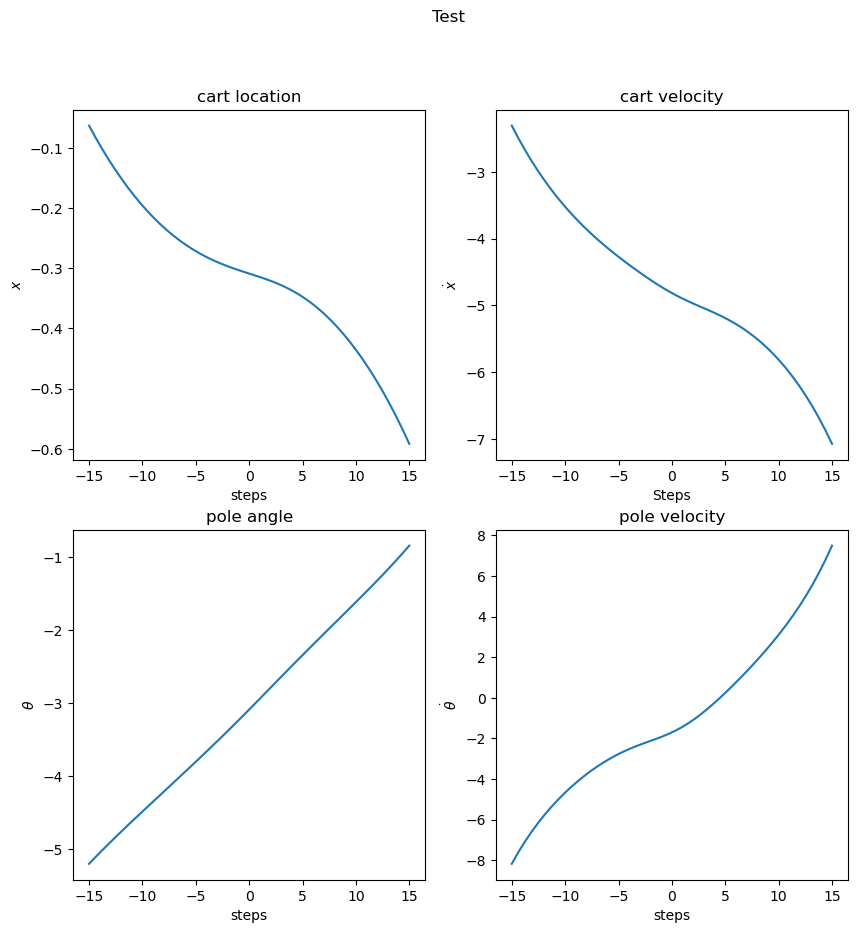

In [23]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

fig, axs = get_subplot("")

y = np.zeros(4)

for ang_vel in ang_vels:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState()])

    cp.reset()
y = y[1:, :]
x = np.tile(ang_vels, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)

    


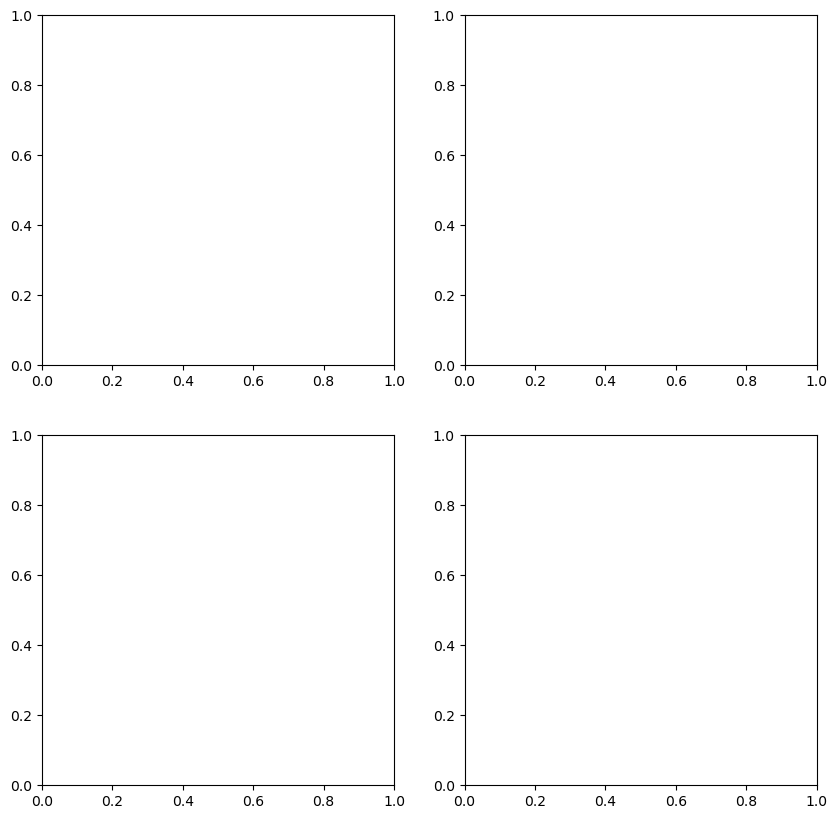

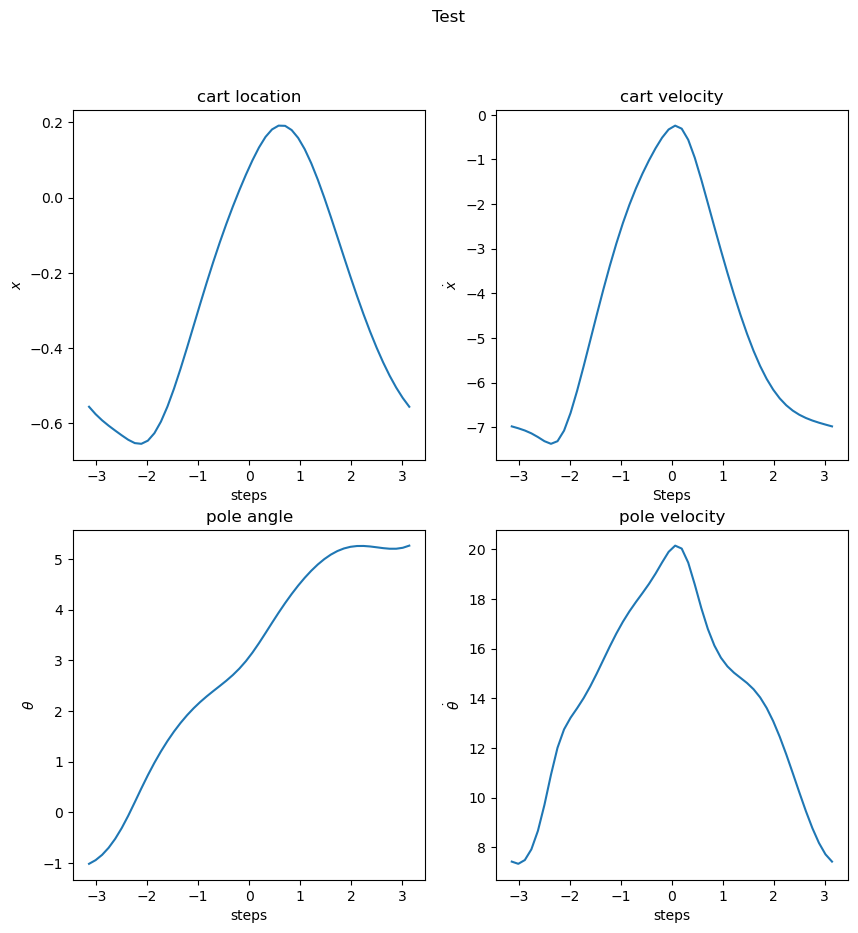

In [15]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
angs = np.linspace(ANG_LOW, ANG_HIGH, n)

fig, axs = get_subplot("")

y = np.zeros(4)

for ang in angs:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState()])

    cp.reset()
    
y = y[1:, :]
x = np.tile(angs, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)


[  0.6369617  -4.6042657  -2.8841484 -14.504171 ]


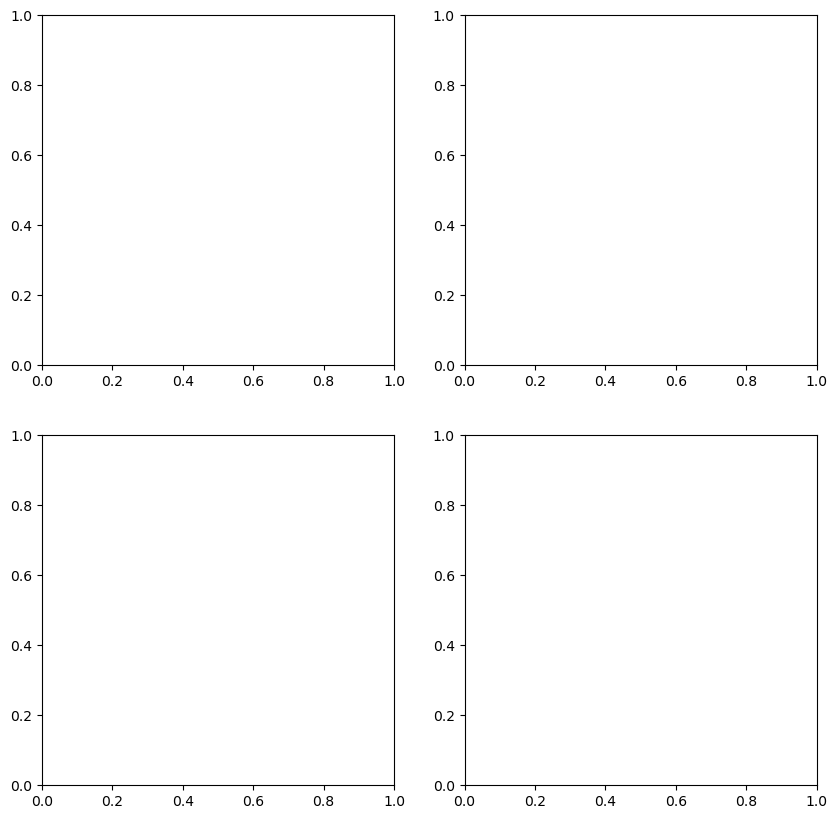

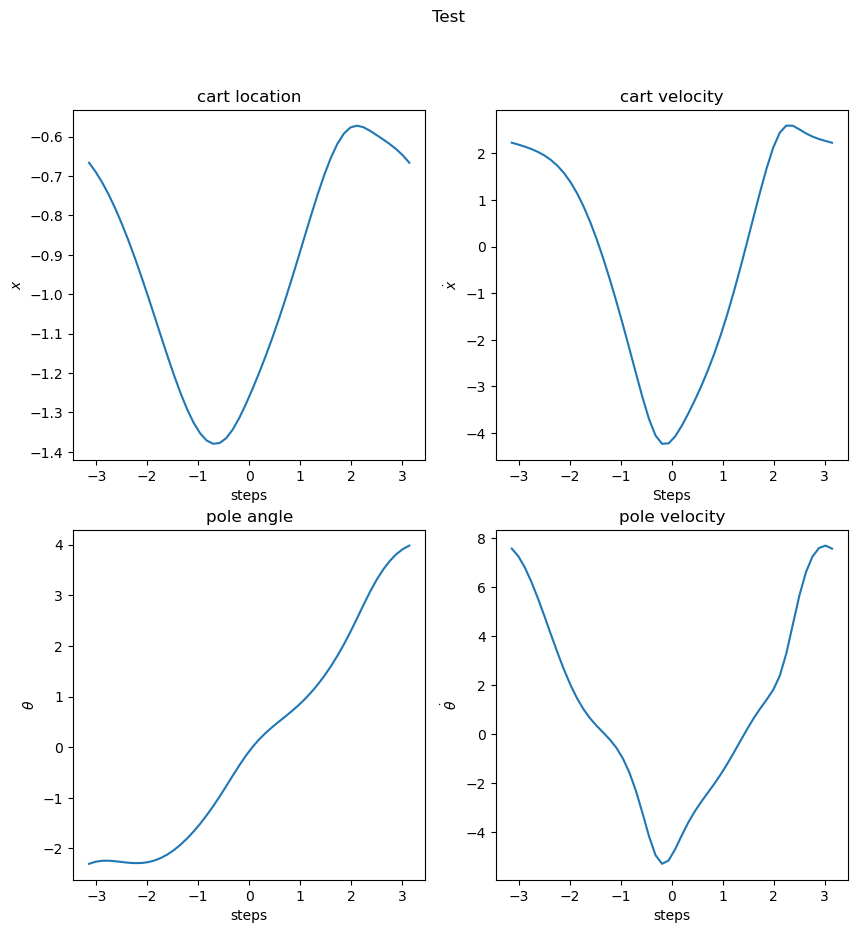

In [21]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vel = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW

angs = np.linspace(ANG_LOW, ANG_HIGH, n)

fig, axs = get_subplot("")

y = np.zeros(4)
x0 = np.array([pos, vel, ang, ang_vel])
print(x0)
for ang in angs:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState() - x0])

    cp.reset()
y = y[1:, :]
x = np.tile(angs, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)




[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.00111747e-01  2.29621720e+00 -2.31790233e+00  6.32255459e+00]
 [-7.19937801e-01  2.10979152e+00 -2.22486758e+00  6.88903713e+00]
 [-7.38696456e-01  1.93554139e+00 -2.13385224e+00  7.40803099e+00]
 [-7.56424427e-01  1.77261543e+00 -2.04456544e+00  7.88480043e+00]
 [-7.73157001e-01  1.62016797e+00 -1.95675588e+00  8.32406616e+00]
 [-7.88925588e-01  1.47739530e+00 -1.87017560e+00  8.72997665e+00]
 [-8.03761244e-01  1.34353590e+00 -1.78460526e+00  9.10609913e+00]
 [-8.17690849e-01  1.21788955e+00 -1.69984317e+00  9.45544243e+00]
 [-8.30740690e-01  1.09979773e+00 -1.61570382e+00  9.78050613e+00]
 [-8.42935443e-01  9.88641024e-01 -1.53201795e+00  1.00833292e+01]
 [-8.54300201e-01  8.83826494e-01 -1.44862390e+00  1.03655338e+01]
 [-8.64858210e-01  7.84787178e-01 -1.36538100e+00  1.06283617e+01]
 [-8.74634802e-01  6.90963507e-01 -1.28215575e+00  1.08727312e+01]
 [-8.83656621e-01  6.01798534e-01 -1.19882655e+00  1.10992889e

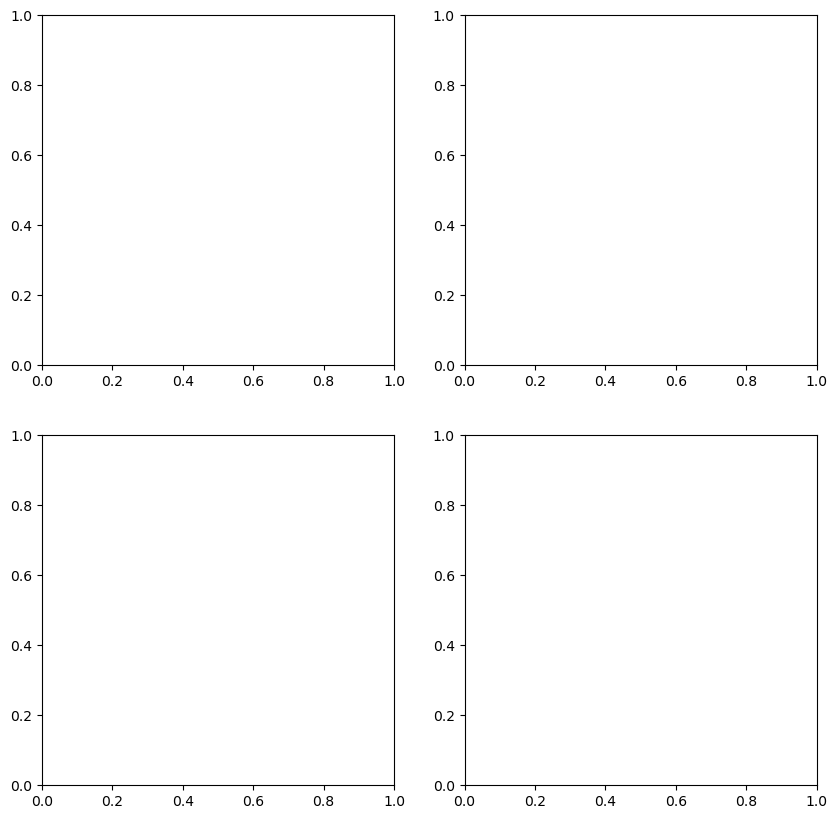

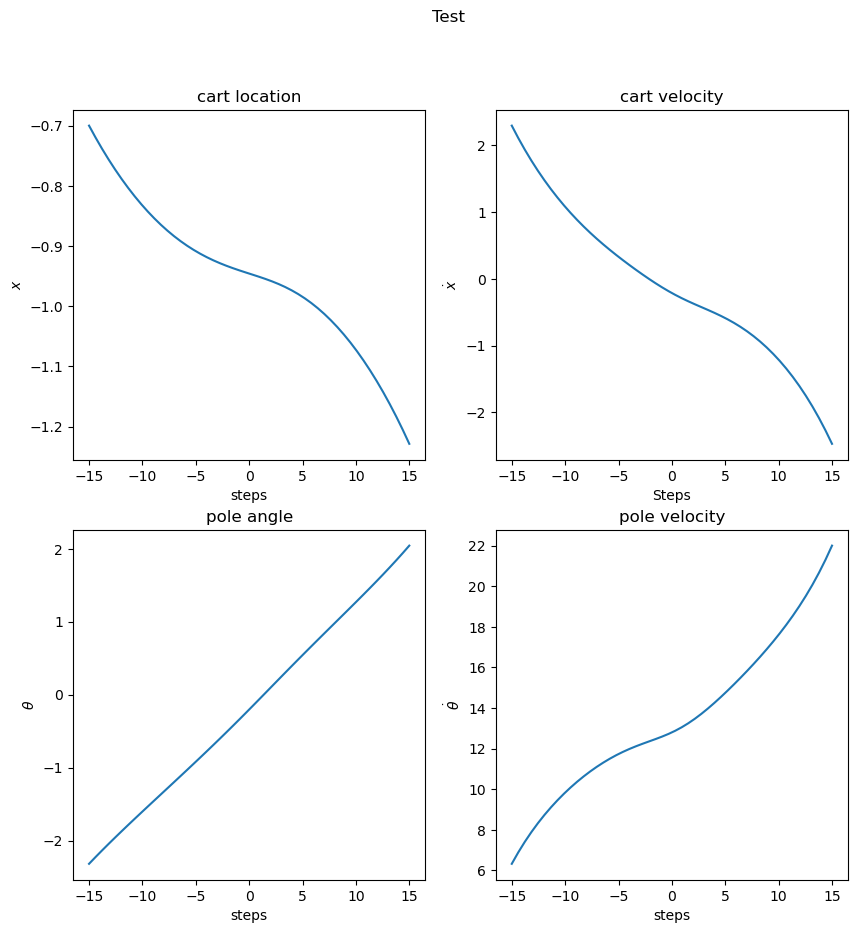

In [24]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vel = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

fig, axs = get_subplot("")

y = np.zeros(4)
x0 = np.array([pos, vel, ang, ang_vel])

for ang_vel in ang_vels:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState() - x0])

    cp.reset()
y = y[1:, :]
x = np.tile(ang_vels, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)

    


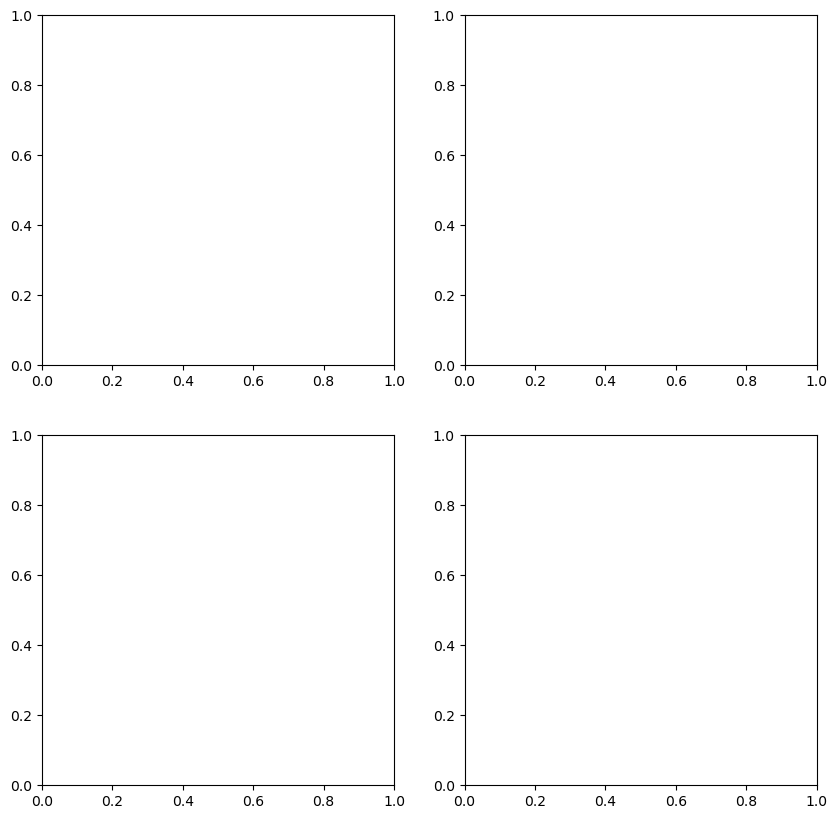

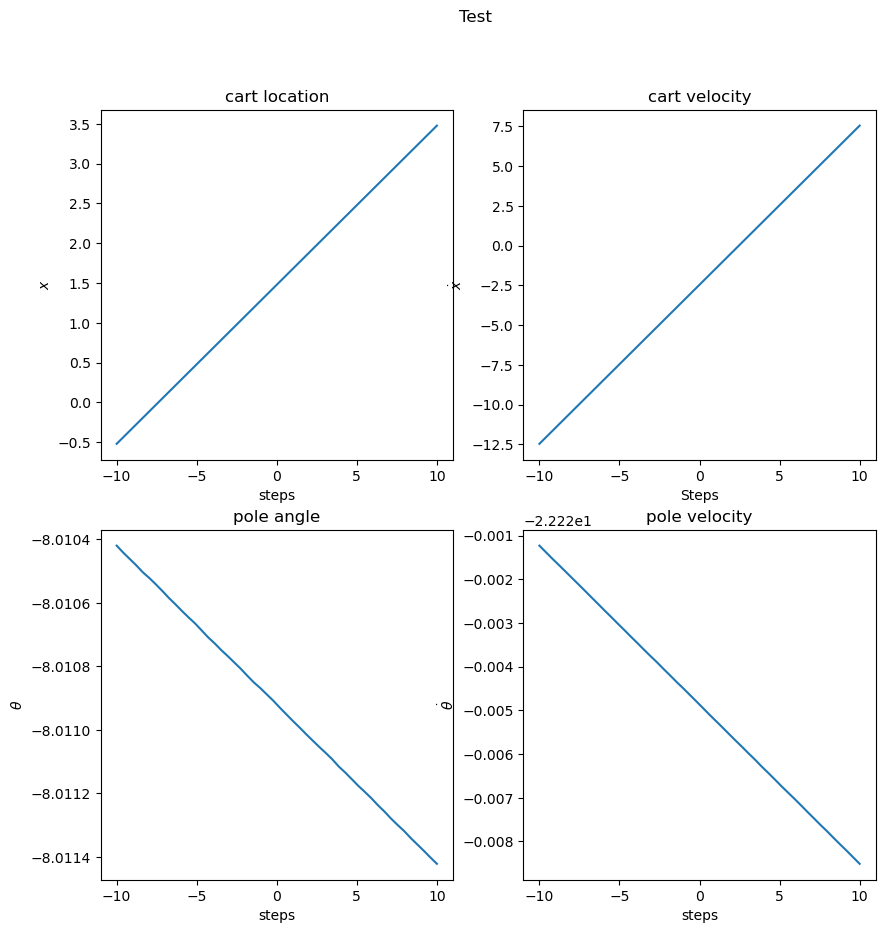

In [26]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 50
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vel = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW
vels = np.linspace(VEL_LOW, VEL_HIGH, n)

fig, axs = get_subplot("")

y = np.zeros(4)
x0 = np.array([pos, vel, ang, ang_vel])

for vel in vels:
    state = np.array([pos, vel, ang, ang_vel])
    cp.setState(state)
    cp.performAction()
    y = np.vstack([y, cp.getState() - x0])

    cp.reset()
y = y[1:, :]
x = np.tile(vels, (4, 1)).T
fig, axs = get_subplot("Test")
plot_states(x, y, fig, axs, None)

    


(10, 10) (10, 10) (10, 10)


[(-3.0, 3.0), (-15.0, 15.0)]

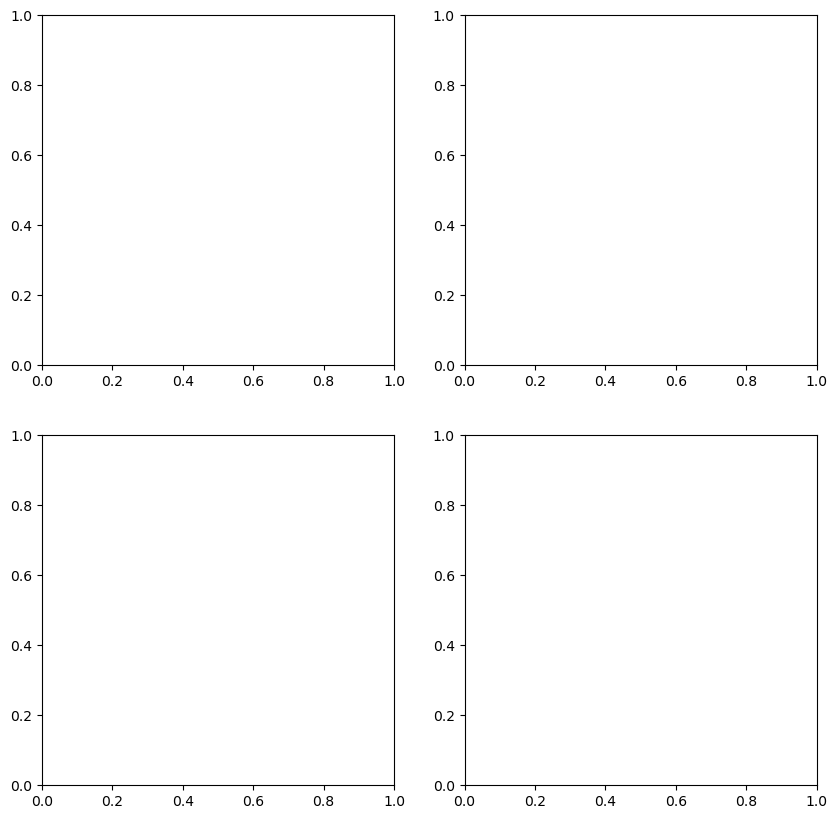

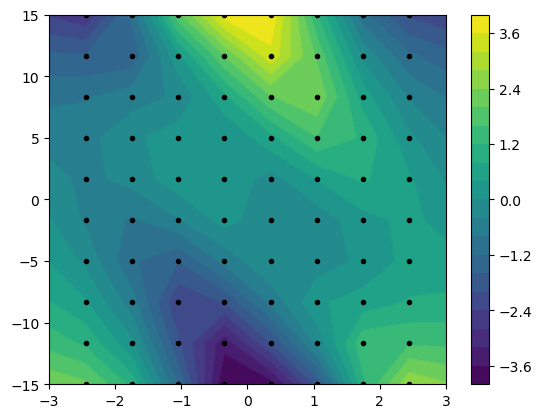

In [57]:
from numpy.random import default_rng

cp = CartPole(visual=False)

VEL_LOW = -10
VEL_HIGH = 10
ANG_VEL_LOW = -15
ANG_VEL_HIGH = 15
ANG_LOW = -np.pi
ANG_HIGH = np.pi

n = 10
rng = default_rng(0)
pos = rng.random()
vel = rng.random() * (VEL_HIGH - VEL_LOW) + VEL_LOW
ang = rng.random() * (ANG_HIGH - ANG_LOW) + ANG_LOW
ang_vel = rng.random() * (ANG_VEL_HIGH - ANG_VEL_LOW) + ANG_VEL_LOW

vels = np.linspace(VEL_LOW, VEL_HIGH, n)
angs = np.linspace(ANG_LOW, ANG_HIGH, n)
ang_vels = np.linspace(ANG_VEL_LOW, ANG_VEL_HIGH, n)

x, y = np.meshgrid(angs, ang_vels, indexing='ij')
z = np.zeros(4)
z0 = np.array([pos, vel, ang, ang_vel])

for i in range(len(x)):
    for j in range(len(y)):
        state = np.array([pos, vel, x[i][j], y[i][j]])
        cp.setState(state)
        cp.performAction()
        z = np.vstack([z, cp.getState() - z0])
        cp.reset()


fig, axs = get_subplot("")
z = z[1:, 1]
z = z.reshape(n, n)
print(z.shape, x.shape, y.shape)


fig, ax = plt.subplots(1,1)

ax.contour(x, y, z, levels=20, linewidths=0.5)
cntr1 = ax.contourf(x, y, z, levels=20)

fig.colorbar(cntr1, ax=ax)
ax.plot(x, y, 'ko', ms=3)
ax.set(xlim=(-3, 3), ylim=(-15, 15))



    
